<a href="https://colab.research.google.com/github/Aayushktyagi/DeepLearning_Resources/blob/master/Fuel_effieiency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic covered**

*   Loading data into keras with datset.data format
*   Data cleaning by removing NA entries
*   Catarogical to numerical conversion
*   Data visualization using pairplot
*   Data normalization 
*   Training Neural network for regression task
*   Regularizing Neural network using Early stopping
*   Model Evaluation and prediction









In [0]:
!pip3 install tensorflow==2.0.0-beta1
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tensorflow import keras
from tensorflow.keras import layers 
import seaborn as sns 
tf.__version__


'2.0.0-beta1'

In [0]:
#Load dataset 
data_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data_path

'/root/.keras/datasets/auto-mpg.data'

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(data_path,sep = " ",names = column_names,skipinitialspace=True,
                          comment = "\t",na_values = "?")
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


1)**Data cleaning**

2) **Converting Catagorical into numeric/one-hot**

In [0]:
#Dataset Preprocessing
#Data cleaning 
dataset.isna().sum()
#in case of num values present : Dropping rows with null value 
dataset = dataset.dropna()

#convering the catagorical dataset into one hot format
origin  = dataset.pop("Origin")
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail() 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


1) **Data spliting**

2) **Data inspection**

In [0]:
#spliting dataset
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)



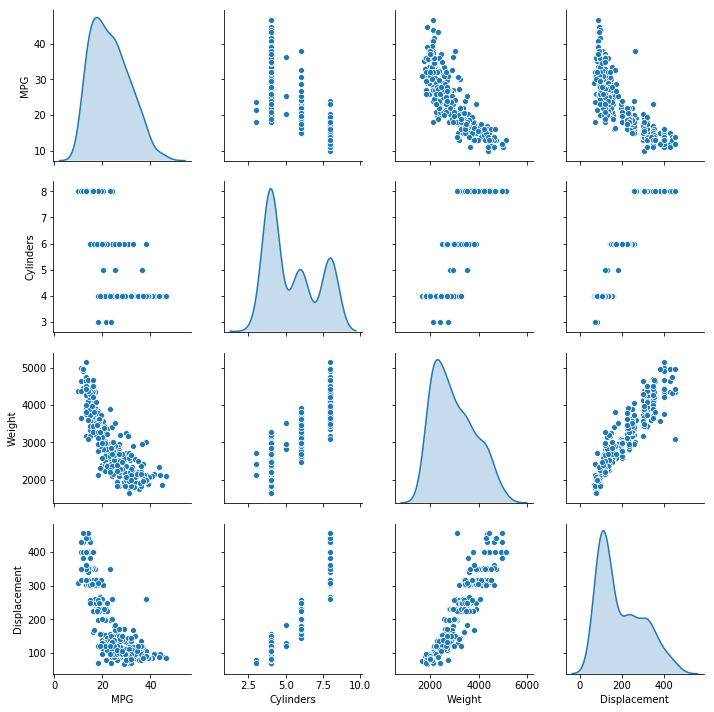

In [0]:
#pairplot
sns.pairplot(train_dataset[['MPG','Cylinders','Weight','Displacement']],diag_kind="kde")

In [0]:
#Describe dataset
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

#Remove label 
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

**Data normalization**

Data normaliztion using data statictics . We are using z-square normalization (x - mean / std) . 

In [0]:
#Data normalization
def norm(x):
  return (x - train_stats["mean"]) / train_stats["std"]
normalized_train_data = norm(train_dataset)
normalized_test_data = norm(test_dataset)

**Model**

Using keras sequentail API with 2 hidden layer and 1 output neuron for predicting MPG . Input layer size is equal to number of features when using all features. 

In [0]:
def build_model():
  model = keras.Sequential([
          layers.Dense(64,activation = 'relu', input_shape = [len(train_dataset.keys())]),
          layers.Dense(64,activation = 'relu'),
          layers.Dense(1)
  ])
  optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(loss = 'mse',
                optimizer = optimizer,
                metrics = ['mae','mse'])
  return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


**Training Model**

In [0]:

epochs = 1000
history = model.fit(
    normalized_train_data , train_labels,
    epochs = 1000,validation_split = 0.8,
    verbose = 1)


Train on 62 samples, validate on 252 samples
Epoch 1/1000
62/62 [==============================] - 0s 285us/sample - loss: 0.0203 - mae: 0.1201 - mse: 0.0203 - val_loss: 12.8290 - val_mae: 2.5261 - val_mse: 12.8290
Epoch 2/1000
62/62 [==============================] - 0s 240us/sample - loss: 0.0444 - mae: 0.1678 - mse: 0.0444 - val_loss: 12.9697 - val_mae: 2.5511 - val_mse: 12.9697
Epoch 3/1000
62/62 [==============================] - 0s 314us/sample - loss: 0.0870 - mae: 0.2349 - mse: 0.0870 - val_loss: 12.8876 - val_mae: 2.5310 - val_mse: 12.8876
Epoch 4/1000
62/62 [==============================] - 0s 245us/sample - loss: 0.0818 - mae: 0.2406 - mse: 0.0818 - val_loss: 12.8699 - val_mae: 2.4954 - val_mse: 12.8699
Epoch 5/1000
62/62 [==============================] - 0s 249us/sample - loss: 0.1917 - mae: 0.3340 - mse: 0.1917 - val_loss: 13.2325 - val_mae: 2.5215 - val_mse: 13.2325
Epoch 6/1000
62/62 [==============================] - 0s 250us/sample - loss: 0.3638 - mae: 0.4825 - mse:

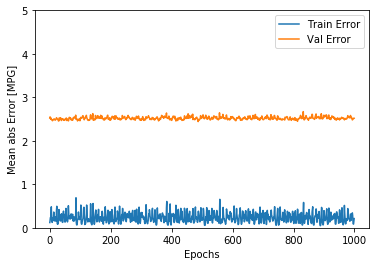

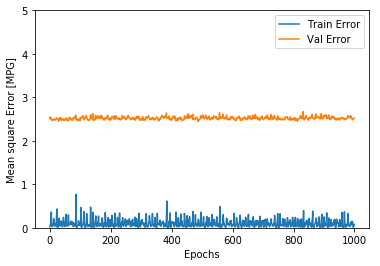

In [0]:
#visualize training 
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean abs Error [MPG]')
  plt.plot(hist['epoch'],hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'] , hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean square Error [MPG]')
  plt.plot(hist['epoch'],hist['mse'],
           label = 'Train Error')
  plt.plot(hist['epoch'] , hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

plot_history(history)


**Model Training With early stop regularization**

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 868us/sample - loss: 573.3731 - mae: 22.6668 - mse: 573.3731 - val_loss: 564.0885 - val_mae: 22.4435 - val_mse: 564.0886
Epoch 2/1000
251/251 [==============================] - 0s 71us/sample - loss: 521.0569 - mae: 21.5203 - mse: 521.0569 - val_loss: 510.5645 - val_mae: 21.2644 - val_mse: 510.5645
Epoch 3/1000
251/251 [==============================] - 0s 71us/sample - loss: 471.0440 - mae: 20.3787 - mse: 471.0440 - val_loss: 454.0522 - val_mae: 19.9530 - val_mse: 454.0522
Epoch 4/1000
251/251 [==============================] - 0s 87us/sample - loss: 416.6938 - mae: 19.0924 - mse: 416.6938 - val_loss: 392.2435 - val_mae: 18.4257 - val_mse: 392.2435
Epoch 5/1000
251/251 [==============================] - 0s 88us/sample - loss: 359.1702 - mae: 17.6188 - mse: 359.1702 - val_loss: 329.9060 - val_mae: 16.7310 - val_mse: 329.9060
Epoch 6/1000
251/251 [==============================] - 0s 

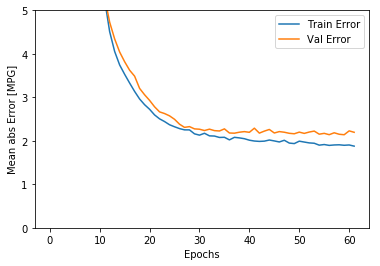

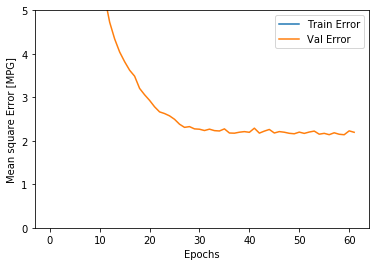

In [0]:
#Model with early stop

model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(normalized_train_data,train_labels,
                    epochs = 1000 , validation_split = 0.2,
                    callbacks = [early_stop])
plot_history(history)

**Model Evaluation and predict**

In [0]:
#model evaluation 
loss,mae,mse = model.evaluate(normalized_test_data, test_labels)
print("Loss:{} , mae:{}, mse:{}".format(loss,mae,mse))

78/78 [==============================] - 0s 470us/sample - loss: 5.6923 - mae: 1.7968 - mse: 5.6923
Loss:5.692274154760899 , mae:1.7967547178268433, mse:5.69227409362793


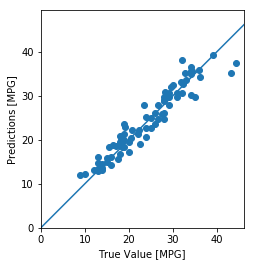

In [0]:
#Model Prediction 
test_predictions = model.predict(normalized_test_data).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Value [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100])
